In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [2]:
# Import data
df_qty = pd.read_csv("datasets/1_target_ts.csv")
df_price = pd.read_csv("datasets/2_related_ts.csv", header=None, names=["item", "org", "date", "unit_price"])

#### Qty

In [3]:
df_qty.head()

,item,org,date,quantity
0,3959294,1617388,2014-03-01,6375.0
1,3959294,1617388,2014-04-01,6797.0
2,3959294,1617388,2014-05-01,7091.0
3,3959294,1617388,2014-06-01,7499.0
4,3959294,1617388,2014-07-01,7603.0


In [4]:
df_qty.nunique(axis=0)

item          50
org            4
date          84
quantity    5812
dtype: int64

In [5]:
df_qty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491 entries, 0 to 9490
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      9491 non-null   int64  
 1   org       9491 non-null   int64  
 2   date      9491 non-null   object 
 3   quantity  9491 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 296.7+ KB


#### Price

In [6]:
df_price.head()

,item,org,date,unit_price
0,3959294,1617388,2014-03-01,0.530465
1,3959294,1617388,2014-04-01,0.531425
2,3959294,1617388,2014-05-01,0.528394
3,3959294,1617388,2014-06-01,0.532754
4,3959294,1617388,2014-07-01,0.538318


In [7]:
df_price.nunique(axis=0)

item            50
org              4
date            84
unit_price    8709
dtype: int64

In [8]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        16800 non-null  int64  
 1   org         16800 non-null  int64  
 2   date        16800 non-null  object 
 3   unit_price  16800 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 525.1+ KB


In [9]:
df_qty[(df_qty["item"] == 3959294) & (df_qty["org"] == 1617388)]

,item,org,date,quantity
0,3959294,1617388,2014-03-01,6375.0
1,3959294,1617388,2014-04-01,6797.0
2,3959294,1617388,2014-05-01,7091.0
3,3959294,1617388,2014-06-01,7499.0
4,3959294,1617388,2014-07-01,7603.0
...,...,...,...,...
79,3959294,1617388,2020-10-01,6552.0
80,3959294,1617388,2020-11-01,5301.0
81,3959294,1617388,2020-12-01,8567.0
82,3959294,1617388,2021-01-01,3718.0


Based on the length of both dataframes, found that both of lengths are different.

In [10]:
df_qty['pair'] = df_qty.item.astype(str) + '|' + df_qty.org.astype(str) + '|' + df_qty.date.astype(str)
df_price['pair'] = df_price.item.astype(str) + '|' + df_price.org.astype(str) + '|' + df_price.date.astype(str)

In [11]:
qty_pair_not_in_price = [pair for pair in df_price.pair.unique() if pair not in df_qty.pair.unique()]
qty_pair_not_in_price[:20]

['3994423|1617388|2014-03-01',
 '3994423|1617388|2014-04-01',
 '3994423|1617388|2014-05-01',
 '3994423|1617388|2014-06-01',
 '3994423|1617388|2014-07-01',
 '3994423|1617388|2014-08-01',
 '3994423|1617388|2014-09-01',
 '3994423|1617388|2014-10-01',
 '3994423|1617388|2014-11-01',
 '3994423|1617388|2014-12-01',
 '3994423|1617388|2015-01-01',
 '3994423|1617388|2015-02-01',
 '3994423|1617388|2015-03-01',
 '3994423|1617388|2015-04-01',
 '3994423|1617388|2015-05-01',
 '3994423|1617388|2015-06-01',
 '3994423|1617388|2015-07-01',
 '3994423|1617388|2015-08-01',
 '3994423|1617388|2015-09-01',
 '3994423|1617388|2015-10-01']

In [12]:
# Let's see how the data should be for specific item and org
chosen_item = 3994423
chosen_org = 1617388
[pair for pair in df_qty.pair.unique() if '|'.join(pair.split('|')[:-1]) == f'{chosen_item}|{chosen_org}'][:20]

['3994423|1617388|2015-11-01',
 '3994423|1617388|2015-12-01',
 '3994423|1617388|2016-01-01',
 '3994423|1617388|2016-02-01',
 '3994423|1617388|2016-03-01',
 '3994423|1617388|2016-04-01',
 '3994423|1617388|2016-05-01',
 '3994423|1617388|2016-06-01',
 '3994423|1617388|2016-07-01',
 '3994423|1617388|2016-08-01',
 '3994423|1617388|2016-09-01',
 '3994423|1617388|2016-10-01',
 '3994423|1617388|2016-11-01',
 '3994423|1617388|2016-12-01',
 '3994423|1617388|2017-01-01',
 '3994423|1617388|2017-02-01',
 '3994423|1617388|2017-03-01',
 '3994423|1617388|2017-04-01',
 '3994423|1617388|2017-05-01',
 '3994423|1617388|2017-06-01']

Some products have different starting date for their corresponding quantity and unit price. So, we go along with it.

In [13]:
df_qty.drop("pair", axis=1, inplace=True)
df_price.drop("pair", axis=1, inplace=True)

### Data Preprocessing

In [14]:
df_combined = pd.merge(left=df_qty, right=df_price, on=["item", "org", "date"])
df_combined

,item,org,date,quantity,unit_price
0,3959294,1617388,2014-03-01,6375.0,0.530465
1,3959294,1617388,2014-04-01,6797.0,0.531425
2,3959294,1617388,2014-05-01,7091.0,0.528394
3,3959294,1617388,2014-06-01,7499.0,0.532754
4,3959294,1617388,2014-07-01,7603.0,0.538318
...,...,...,...,...,...
9486,149440644,42023714,2020-10-01,1577.0,1.520872
9487,149440644,42023714,2020-11-01,1127.0,1.582506
9488,149440644,42023714,2020-12-01,1613.0,1.489875
9489,149440644,42023714,2021-01-01,1591.0,1.497768


In [15]:
# Change data-type for column `date`
df_combined['date'] = pd.to_datetime(df_combined['date'], format='%Y-%m-%d')
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491 entries, 0 to 9490
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   item        9491 non-null   int64         
 1   org         9491 non-null   int64         
 2   date        9491 non-null   datetime64[ns]
 3   quantity    9491 non-null   float64       
 4   unit_price  9491 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 370.9 KB


In [16]:
# Separate data for distinct item and org
def structuring_data(
        df: pd.DataFrame, 
        date_col: str, 
        first_order_col: str, 
        second_order_col: str,
    ) -> dict :

    """
    Serialize the specified dataframe into dictionary of two-level keys

    Parameters
    ------------
        df: specified DataFrame
        date_col: date-type column contained in df
        first_order_col: first column contained in df
        second_order_col: second column contained in df
        agg_map: aggregate function for each column

    Return
    ------------
        data: two-level dictionary of df
    """
    data = {}

    for feature_1 in df[first_order_col].unique():

        # Filtering to column `item`
        sub_df = df[df[first_order_col] == feature_1]
        data[feature_1] = {}

        for feature_2 in sub_df[second_order_col].unique():

            # Resample index to be monthly date
            sub_data = sub_df[sub_df[second_order_col] == feature_2].set_index(date_col).resample("1MS").agg({"quantity": "sum", "unit_price": "mean"})
            
            # Add this data in dictionary
            data[feature_1][feature_2] = sub_data.reset_index()

    return data

data = structuring_data(df_combined, date_col="date", first_order_col="org", second_order_col="item")

### Data Analysis

In [17]:
# Examine on this sub data only
chosen_item = 3994423
chosen_org = 1617388

chosen_data = data[chosen_org][chosen_item].copy()
chosen_data.head()

,date,quantity,unit_price
0,2015-11-01,2019.0,1.406199
1,2015-12-01,5200.0,1.426339
2,2016-01-01,4133.0,1.478580
3,2016-02-01,5267.0,1.454077
4,2016-03-01,4184.0,1.460914


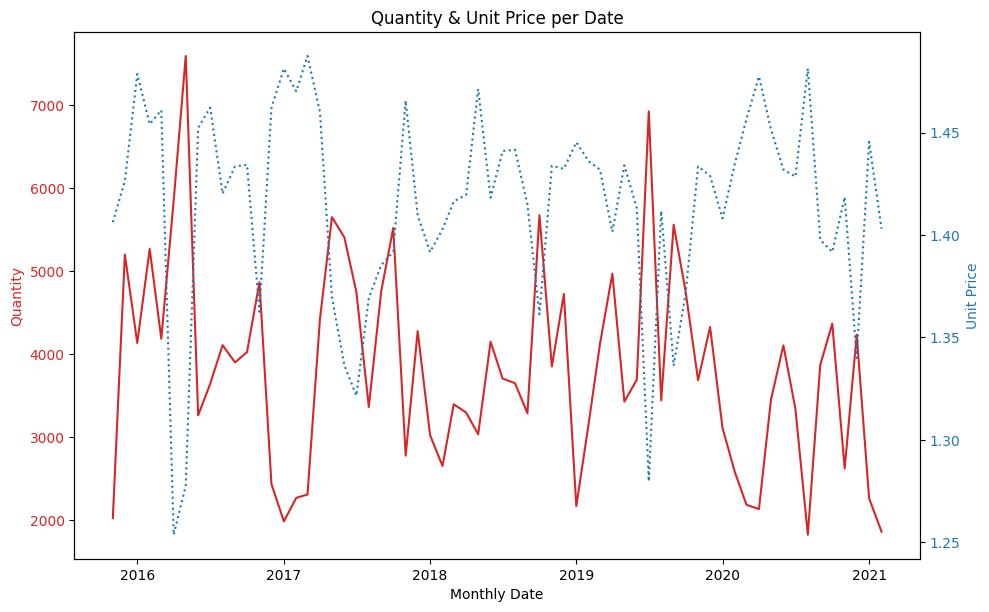

In [18]:
def plot_2_ts_data(date_index: pd.DatetimeIndex, data1: pd.Series, data2: pd.Series, **kwargs):
    """
    Plot two time series data in 1 figure, sharing same x-axis

    Parameters
    ------------
        date_index: date-type column or indexes
        data1: first time series data
        data2: second time series data
    """

    # Figure 1
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = "tab:red"
    ax1.set_xlabel("Monthly Date")
    ax1.set_ylabel(kwargs.get("label_1"), color=color)
    ax1.plot(date_index, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Figure 2
    ax2 = ax1.twinx()

    color = "tab:blue"
    ax2.set_ylabel(kwargs.get("label_2"), color=color)
    ax2.plot(date_index, data2, color=color, linestyle='dotted')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(kwargs.get("title"))
    plt.show()

plot_2_ts_data(
    date_index=chosen_data.date, 
    data1=chosen_data.quantity, 
    data2=chosen_data.unit_price,
    label_1="Quantity",
    label_2="Unit Price",
    title="Quantity & Unit Price per Date"
)

As we know, that price is negatively correlated with quantity. Interestingly, there is something in mid of 2017, like how quantity's trend movement is almost the same as unit price's.

In [19]:
from scipy.stats import pearsonr

corr_coef, _ = pearsonr(chosen_data.quantity, chosen_data.unit_price)
print(f"Correlation of Quantity vs Price: {corr_coef}")

Correlation of Quantity vs Price: -0.7031865204327995


### Model Building: FBProphet

In [20]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from dateutil.relativedelta import relativedelta
import logging
from typing import Union

/home/iam2dael/sales-forecasting/venv_sales_forecasting/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [21]:
def prepare_data(
    data: Union[pd.DataFrame, pd.Series], 
    ds: str, 
    y: str,
    ds_format: str = '%m'
) -> Union[pd.DataFrame, pd.Series]:
    """
    Preprocess data to be able to continue on forecasting by Prophet

    Parameters
    ------------
        data: pandas DataFrame or Series
            specified data containing `date` and `observed value` columns

        ds: str
            name of column representing `date` of data

        y: str
            name of column representing `observed value` of data

        ds_format: str
            specified format of date (based on `strftime documentation`)

    Returns
    ------------
        modified_data: pandas DataFrame or Series
            resulting data
    """
    modified_data = data.rename(columns={ds: "ds", y: "y"})
    modified_data['ds'] = pd.to_datetime(modified_data['ds'], format=ds_format)
    return modified_data

In [22]:
# Modify data to be able to be run in FBProphet
df_modified = prepare_data(
    data=chosen_data,
    ds="date",
    y="quantity"
)

df_modified

,ds,y,unit_price
0,2015-11-01,2019.0,1.406199
1,2015-12-01,5200.0,1.426339
2,2016-01-01,4133.0,1.478580
3,2016-02-01,5267.0,1.454077
4,2016-03-01,4184.0,1.460914
...,...,...,...
59,2020-10-01,4366.0,1.391664
60,2020-11-01,2619.0,1.418504
61,2020-12-01,4234.0,1.339886
62,2021-01-01,2257.0,1.445488


In [23]:
def forecast_using_prophet(
    data_to_fit: pd.DataFrame, 
    periods: int, 
    freq: str = 'MS',
    model_params: dict = None,
    **extra_regressor_kwargs
) -> pd.DataFrame:
    """
    Forecast values for next observation by using Prophet model

    Parameters
    ------------
        data_to_fit: pd.DataFrame
            specified data to fit

        periods: int
            number of forecast's periods

        freq: str
            specified frequency of period

        model_params: dict
            specified parameters of Prophet model
    
    Returns
    ------------
        forecast: pd.DataFrame
            resulting forecast with more additional information
    """
    # Set logging level to suppress informational messages
    logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

    # Initialize prophet model
    extra_regressor_name: str = extra_regressor_kwargs.get('extra_regressor_str')
    extra_regressor_mode: str = extra_regressor_kwargs.get('extra_regressor_mode')

    model = Prophet(**model_params) if model_params is not None else Prophet()
    model.add_regressor(
        name=extra_regressor_name, 
        prior_scale=0.5,
        mode=extra_regressor_mode
    ) if None not in (model_params, extra_regressor_name, extra_regressor_mode) else None
    model.fit(df=data_to_fit)

    # Specify which period to be forecasted
    future = model.make_future_dataframe(periods=periods, freq=freq) \
             if extra_regressor_kwargs.get('future') is None \
             else extra_regressor_kwargs.get('future') 

    # Resulting forecasts
    forecasts = model.predict(future)

    return model, forecasts

In [24]:
df_modified_price = prepare_data(
    data=chosen_data,
    ds="date",
    y="unit_price"
).drop("quantity", axis=1)

df_modified_price.head()

,ds,y
0,2015-11-01,1.406199
1,2015-12-01,1.426339
2,2016-01-01,1.478580
3,2016-02-01,1.454077
4,2016-03-01,1.460914


In [25]:
_, price_forecasts = forecast_using_prophet(
    data_to_fit=df_modified_price,
    periods=12,
    freq="MS"
)

price_forecasts.head()

22:16:36 - cmdstanpy - INFO - Chain [1] start processing
22:16:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-01,1.413278,1.384346,1.491412,1.413278,1.413278,0.022915,0.022915,0.022915,0.022915,0.022915,0.022915,0.0,0.0,0.0,1.436193
1,2015-12-01,1.413398,1.377134,1.484960,1.413398,1.413398,0.014933,0.014933,0.014933,0.014933,0.014933,0.014933,0.0,0.0,0.0,1.428332
2,2016-01-01,1.413523,1.372490,1.481154,1.413523,1.413523,0.014395,0.014395,0.014395,0.014395,0.014395,0.014395,0.0,0.0,0.0,1.427918
3,2016-02-01,1.413647,1.376680,1.480328,1.413647,1.413647,0.013077,0.013077,0.013077,0.013077,0.013077,0.013077,0.0,0.0,0.0,1.426724
4,2016-03-01,1.413763,1.423055,1.529791,1.413763,1.413763,0.061163,0.061163,0.061163,0.061163,0.061163,0.061163,0.0,0.0,0.0,1.474926


In [26]:
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import performance_metrics

def fit_cv(
    data_to_fit: pd.DataFrame,
    periods: int,
    horizon: str = '90 days',
    extra_regressor: str = None
) -> pd.DataFrame:
    """
    Return listing of model's parameters with corresponding error

    Parameters
    ------------
        data_to_fit: pd.DataFrame
            specified data to fit

        periods: int
            number of periods to be forecasted

        horizon: str
            size of interval (pd.timeDelta)

        extra_regressor: str
            name of regressor contained in `data_to_fit`

    Returns
    ------------
        tuning_results: pd.DataFrame
            Listing of parameters with corresponding errors
    """
    param_grid = {  
        'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
        'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
        'seasonality_mode': ['additive', 'multiplicative'],
        'mode': ['additive', 'multiplicative'],
    }

    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses = []  # Store the RMSEs for each params here

    # Use cross validation to evaluate all parameters
    for params in all_params:
        
        # Initialize parameters for model
        model_params_init = {param: value for param, value in params.items() if param != 'mode'}

        # Initialize parameter for extra regressor
        extra_param = {param: value for param, value in params.items() if param == 'mode'}

        # Set logging level to suppress informational messages
        logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

        # Fit model with given params
        model = Prophet(**model_params_init)  
        model.add_regressor(extra_regressor, prior_scale=0.5, **extra_param) if extra_regressor is not None else None
        model.fit(data_to_fit)

        # Cross validation
        size = len(data_to_fit) - (periods * 3)

        # ==> Assign cutoffs
        start_dt = data_to_fit.loc[size, "ds"]
        end_dt = data_to_fit.iloc[-1]['ds']
        cutoffs = [date for date in pd.date_range(start=start_dt, end=end_dt, freq=f'{periods-1}MS') if date < (end_dt - relativedelta(months=periods))]

        df_cv = cross_validation(model, cutoffs=cutoffs, horizon=horizon, parallel="processes")
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmses.append(df_p['rmse'].values[0])

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmses

    return tuning_results

tuning_results = fit_cv(
    data_to_fit=df_modified,
    periods=3,
    extra_regressor="unit_price"
)

tuning_results.sort_values(by='rmse').head()

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mode,rmse
53,0.5,0.1,additive,multiplicative,341.380648
52,0.5,0.1,additive,additive,349.239992
54,0.5,0.1,multiplicative,additive,371.268130
55,0.5,0.1,multiplicative,multiplicative,377.562459
58,0.5,1.0,multiplicative,additive,397.641030


In [27]:
# Sort model parameters obtained by cross validation
params_sorted_by_rmse = tuning_results.sort_values(by="rmse", ascending=True)
best_params = params_sorted_by_rmse.drop('rmse', axis=1).iloc[0].to_dict()

best_params

{'changepoint_prior_scale': 0.5,
 'seasonality_prior_scale': 0.1,
 'seasonality_mode': 'additive',
 'mode': 'multiplicative'}

In [28]:
best_model_params = {param: value for param, value in best_params.items() if param != 'mode'}
extra_regressor_mode = best_params['mode']

# Forecast `quantity`
qty_model, qty_forecasts = forecast_using_prophet(
    data_to_fit=df_modified,
    periods=12,
    model_params=best_model_params,
    extra_regressor_name='unit_price',
    extra_regressor_mode=extra_regressor_mode,
    future=price_forecasts[['ds', 'yhat']].rename(columns={'yhat': 'unit_price'})
)

qty_forecasts.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-01,4624.043199,2815.605279,5259.253264,4624.043199,4624.043199,-624.896089,-624.896089,-624.896089,-624.896089,-624.896089,-624.896089,0.0,0.0,0.0,3999.147110
1,2015-12-01,4579.668445,3763.536667,6014.201286,4579.668445,4579.668445,329.466636,329.466636,329.466636,329.466636,329.466636,329.466636,0.0,0.0,0.0,4909.135081
2,2016-01-01,4533.814533,2334.314554,4661.205829,4533.814533,4533.814533,-1033.046164,-1033.046164,-1033.046164,-1033.046164,-1033.046164,-1033.046164,0.0,0.0,0.0,3500.768369
3,2016-02-01,4487.960611,2465.936057,4915.847319,4487.960611,4487.960611,-789.307437,-789.307437,-789.307437,-789.307437,-789.307437,-789.307437,0.0,0.0,0.0,3698.653174
4,2016-03-01,4445.065006,2660.031067,5023.331789,4445.065006,4445.065006,-677.791965,-677.791965,-677.791965,-677.791965,-677.791965,-677.791965,0.0,0.0,0.0,3767.273041


/home/iam2dael/sales-forecasting/venv_sales_forecasting/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/iam2dael/sales-forecasting/venv_sales_forecasting/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


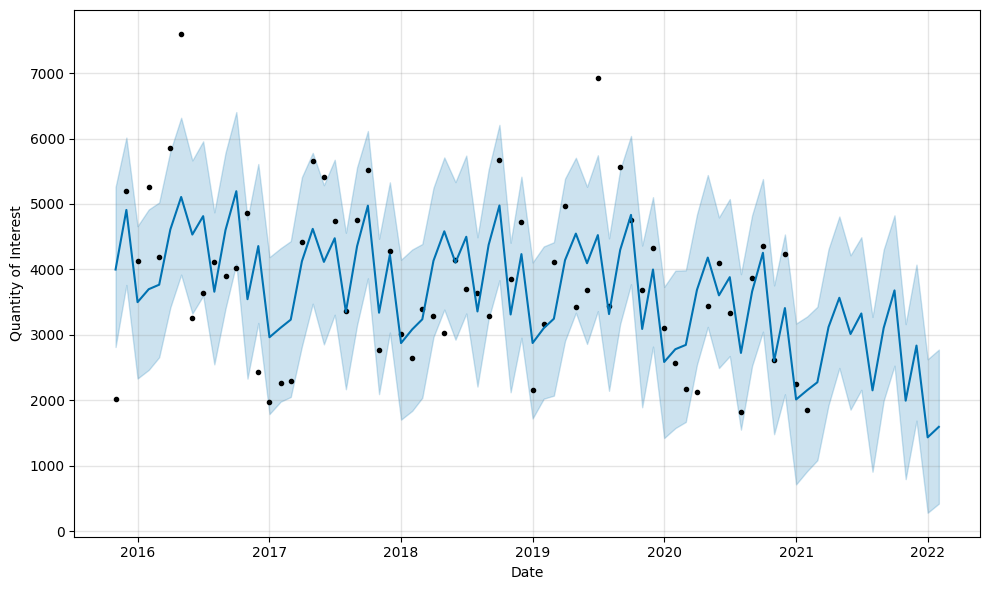

In [29]:
# Visualize the predictions
qty_model.plot(qty_forecasts)
plt.xlabel('Date')
plt.ylabel('Quantity of Interest')
plt.show()

/home/iam2dael/sales-forecasting/venv_sales_forecasting/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/iam2dael/sales-forecasting/venv_sales_forecasting/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/iam2dael/sales-forecasting/venv_sales_forecasting/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future ve

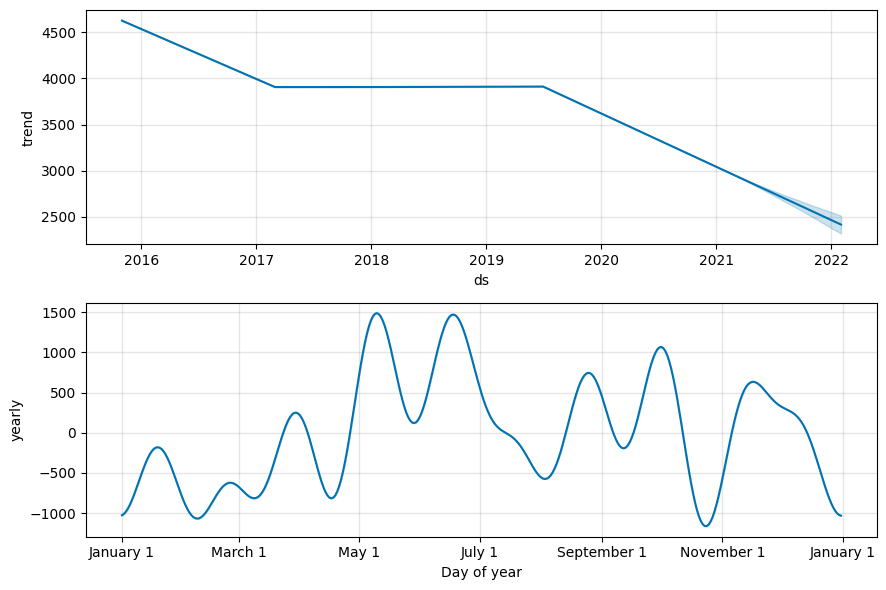

In [30]:
# Plot the trend and yearly seasonality components
qty_model.plot_components(qty_forecasts)
plt.show()